# 2일차 - 25년 7월 5일

- 완전연결 신경망(Fully-connected net) 구조를 직접 코드로 구성
- 예시 데이터는 sklearn.datasets의 분류용 데이터 사용 (make_classification)-


Epoch 5/30, Loss: 0.8756
Epoch 10/30, Loss: 0.5895
Epoch 15/30, Loss: 0.4354
Epoch 20/30, Loss: 0.3558
Epoch 25/30, Loss: 0.3059
Epoch 30/30, Loss: 0.2593
✅ Test Accuracy: 84.50%


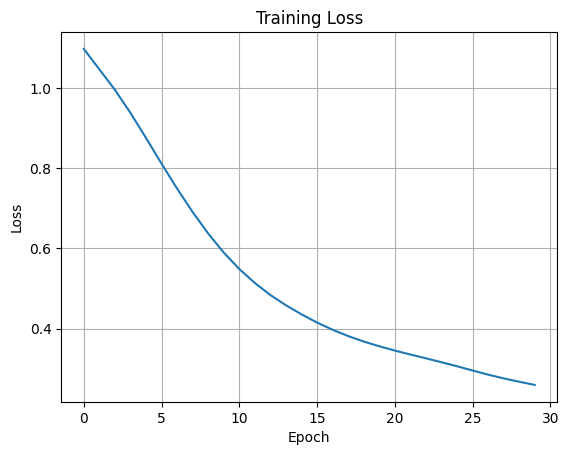

In [3]:
# 📌 1. 기본 설정
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# 데이터 생성
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=5, random_state=42)

# 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Tensor 변환
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


# 📌 2. DNN 모델 정의 (입력 → 은닉층2개 → softmax)

class SimpleDNN(nn.Module):
    def __init__(self):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(10, 64)     # 입력: 10차원
        self.fc2 = nn.Linear(64, 32)     # 은닉층1
        self.out = nn.Linear(32, 3)      # 출력: 클래스 3개

    def forward(self, x):
        x = F.relu(self.fc1(x))          # h(1) = ReLU(W1·x)
        x = F.relu(self.fc2(x))          # h(2) = ReLU(W2·h1)
        x = self.out(x)                  # W3·h2
        return F.log_softmax(x, dim=1)   # softmax(W3·h2)

model = SimpleDNN()

# 📌 3. 학습 루프 정의

optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.NLLLoss()

epochs = 30
loss_history = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = loss_fn(output, y_train)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())
    if (epoch+1) % 5 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 📌 4. 테스트 정확도 확인

model.eval()
with torch.no_grad():
    pred = model(X_test).argmax(dim=1)
    accuracy = (pred == y_test).float().mean()
    print(f"✅ Test Accuracy: {accuracy.item():.2%}")


# 📌 5. 학습 그래프 시각화

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.show()